In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import requests
import json
from sodapy import Socrata
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get("43nn-pn8j", limit=20000)
results_df = pd.DataFrame.from_records(results)
results_df.count()

action                   20000
boro                     20000
building                 19949
camis                    20000
critical_flag            20000
cuisine_description      20000
dba                      20000
grade                    10556
grade_date               10556
inspection_date          20000
inspection_type          20000
phone                    20000
record_date              20000
score                    19248
street                   20000
violation_code           19763
violation_description    19672
zipcode                  19591
dtype: int64

In [3]:
results_df.to_csv('Outputs/smallpractice_data.csv', index=True)

# Step 1: Drop useless columns 

In [4]:
results_df.columns

Index(['action', 'boro', 'building', 'camis', 'critical_flag',
       'cuisine_description', 'dba', 'grade', 'grade_date', 'inspection_date',
       'inspection_type', 'phone', 'record_date', 'score', 'street',
       'violation_code', 'violation_description', 'zipcode'],
      dtype='object')

In [5]:
newresultsdf= results_df.drop(columns=['camis','building','grade_date','violation_description'])

In [6]:
newresults2 = newresultsdf.drop(columns=['inspection_type','phone','record_date','score','violation_code','street'])

In [7]:
newresults2.to_csv('Outputs/small_practice_cleaned_data.csv', index=True)
newresults2.head()

,action,boro,critical_flag,cuisine_description,dba,grade,inspection_date,zipcode
0,Violations were cited in the following area(s).,BRONX,Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462
1,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462
2,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462
3,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462
4,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462


In [8]:
#clean data: change column headings, add index, fix timestamp to YYMMDD, Count inspections per year
#combine cuisines if desired? --Not desired, only 57 types.
newresults2.describe()

,action,boro,critical_flag,cuisine_description,dba,grade,inspection_date,zipcode
count,20000,20000,20000,20000,20000,10556,20000,19591
unique,5,5,3,57,1065,5,1077,169
top,Violations were cited in the following area(s).,MANHATTAN,Critical,American,MCDONALD'S,A,2019-05-16T00:00:00.000,10003
freq,19010,10172,10775,6513,347,8747,66,812


In [9]:
countboro = newresults2["boro"].value_counts()
countboro

MANHATTAN        10172
QUEENS            4134
BROOKLYN          3287
BRONX             1298
STATEN ISLAND     1109
Name: boro, dtype: int64

In [10]:
countaction = newresults2["action"].value_counts()
countaction

Violations were cited in the following area(s).                                                                                        19010
Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.      559
No violations were recorded at the time of this inspection.                                                                              229
Establishment re-opened by DOHMH                                                                                                         165
Establishment re-closed by DOHMH                                                                                                          37
Name: action, dtype: int64

In [11]:
countgrade = newresults2["grade"].value_counts()
countgrade

A    8747
B    1145
C     383
Z     180
P     101
Name: grade, dtype: int64

In [12]:
countcuisine = newresults2["cuisine_description"].value_counts()
countcuisine.head()

American         6513
Italian          2129
Pizza            1162
Bakery            805
Pizza/Italian     762
Name: cuisine_description, dtype: int64

In [13]:
countdba = newresults2["dba"].value_counts()
countdba.head()

MCDONALD'S                 347
WHITE CASTLE               145
STARBUCKS                  127
BURGER KING                103
ALFONSO'S PASTRY SHOPPE     79
Name: dba, dtype: int64

In [14]:
countcrit = newresults2["critical_flag"].value_counts()
countcrit

Critical          10775
Not Critical       8897
Not Applicable      328
Name: critical_flag, dtype: int64

In [15]:
newresults2.columns

Index(['action', 'boro', 'critical_flag', 'cuisine_description', 'dba',
       'grade', 'inspection_date', 'zipcode'],
      dtype='object')

In [16]:
final = newresults2.rename(columns={"action": "Action",
                                    "boro": "Borough",
                                    "critical_flag": "Critical_Violations",
                                    "cuisine_description": "Cuisine",
                                    "dba": "Name",
                                    "grade": "Grade",
                                    "inspection_date": "Inspection",
                                    "zipcode": "Zip_Code"
                                   })
final_df = final[['Name','Borough','Zip_Code','Cuisine','Inspection','Grade','Critical_Violations','Action']]
final_df.head()


,Name,Borough,Zip_Code,Cuisine,Inspection,Grade,Critical_Violations,Action
0,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Critical,Violations were cited in the following area(s).
1,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Not Critical,Violations were cited in the following area(s).
2,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Not Critical,Violations were cited in the following area(s).
3,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Not Critical,Violations were cited in the following area(s).
4,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Not Critical,Violations were cited in the following area(s).


In [17]:
final_df['Inspect'] = pd.to_datetime(final_df['Inspection'], errors='coerce')
final_df['Inspect'] = final_df['Inspect'].dt.strftime('%Y')
countyear = final_df['Inspect'].value_counts()
dyear = countyear.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)
dyear

2014       9
2015     604
2016    4372
2017    5208
2018    6574
2019    3233
Name: Inspect, dtype: int64

# Start of Charts

In [18]:
# Bar Graph 1: count of most popular restaurants names
# groupby dba, bargraph with top 10 counted restaurant names
# delete null values in restaurant names

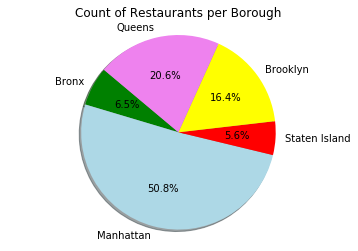

<Figure size 432x288 with 0 Axes>

In [19]:
# BarGraph 2: count of restaurants per borough
# delete restaurants that don't have an assigned borough

# BarGraph 2: count of restaurants per borough
# delete restaurants that don't have an assigned borough

labels = "Bronx","Manhattan","Staten Island","Brooklyn","Queens"
sizes = [1299, 10170, 1119, 3282, 4130]
colors = ["green","lightblue","red","yellow","violet"]
explode = (0, 0, 0, 0,0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Count of Restaurants per Borough")
plt.axis('equal')
plt.show()

plt.savefig('Outputs/Count_restaurants.png')

In [20]:
# Graph 3: heatmap of restaurant density by zipcode
## delete restaurants that don't have an assigned zipcode

In [21]:
# Graph 4: scatter plot, Y= grades, x = cuisines
## Bin grades into integers (6=A, 5=B, 4=C, etc), and average them per cuisine. Label points.


In [22]:
# Graph 4b: scatter plot, Y= closures, x = cuisines
# count of closures by cuisine. Label points.

In [23]:
# Graph 5: heatmap of inspections per zipcode
# delete entries without inspections or zipcodes

In [24]:
# Graph 6: Bargraph of closures and reclosures by borough
# count closures, count reclosures, group by borough

In [25]:
# Graph 6b: heatmap of re/closures by zipcode
# restates graph 6

In [26]:
# Graph 7: heatmap of critical violations by zipcode or scatterplot by cuisine
# describes which areas or cuisines are the most dangerous, as critical violations led foodborne illness

In [27]:
# Graph 8: heatmap of grades by zipcode or scatterplot by cuisine
# describes best and worst zipcodes, shows good/bad restaurants by cuisine

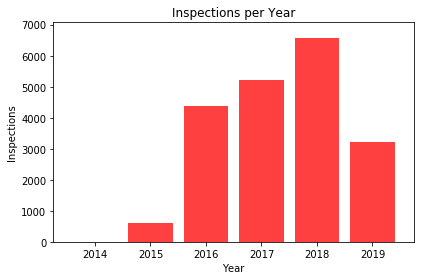

In [28]:
#Graph 9: bargraph showing inspections per year, closures per year

x_axis = np.arange(0, len(dyear))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Inspections per Year")
plt.xlabel("Year")
plt.ylabel("Inspections")

plt.xlim(-0.75, len(dyear)-.25)
plt.ylim(0, max(dyear) + 500)

plt.bar(x_axis, dyear, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, dyear.index)

plt.tight_layout()
plt.show()

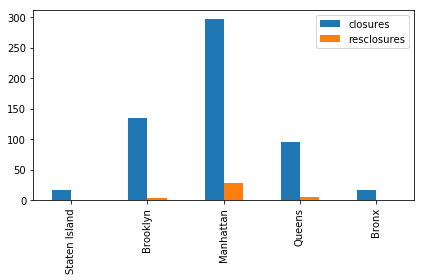

In [34]:
#Graph 9b: bargraph showing closures per year
# Converting the "duration (seconds)" column's values to numeric

closures9b = final_df.copy()
closures9b_df = closures9b.loc[closures9b['Action'] == 
                               "Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.", :]
closures9b_df2 = closures9b.loc[closures9b['Action'] == "Establishment re-closed by DOHMH", :]

# Count how many sightings have occured within each state
closures9b_counts = closures9b_df["Borough"].value_counts()
closures9b_counts2 = closures9b_df2["Borough"].value_counts()
closures9b1 = pd.concat([closures9b_counts,closures9b_counts2], axis=1, join='outer',sort=True)
closures9b2 = np.where(np.isnan(closures9b1), 0, closures9b1)
closures9b3 = pd.DataFrame(data=closures9b2, index=('Staten Island','Brooklyn','Manhattan','Queens','Bronx'), columns=('closures','resclosures'), dtype=None, copy=False)
closures9b3.plot.bar()
plt.tight_layout()
plt.show()

In [ ]:
# Analysis??? Opportunities for Regressions, chi-squares?

In [ ]:
# Get input from user about zipcode. Paste list of restaurants names from zipcode. 
# Get information from user about restaurant name. Print restaurant grade.